<a href="https://colab.research.google.com/github/deliciousushi/MultipleDiseasePrediction/blob/main/kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [2]:
df=pd.read_csv("kidney_disease.csv")

In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
mode=SimpleImputer(missing_values = np.nan , strategy = "most_frequent")
df_clean=pd.DataFrame(mode.fit_transform(df))
df_clean.columns=df.columns
df_clean

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
df_clean['pcv'] = pd.to_numeric(df_clean['pcv'], errors='coerce')
df_clean['wc'] = pd.to_numeric(df_clean['wc'], errors='coerce')
df_clean['rc'] = pd.to_numeric(df_clean['rc'], errors='coerce')

In [8]:
df.select_dtypes(exclude = ['object']).columns
for i in df.select_dtypes(exclude = ['object']).columns:
    df_clean[i] = df_clean[i].apply(lambda x: float(x))

In [9]:
cat_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object']
num_cols = [col for col in df_clean.columns if df_clean[col].dtype != 'object']

In [10]:
df_clean["classification"] = df_clean["classification"].apply(lambda x :"ckd" if x=="ckd\t" else x)
df_clean["cad"] = df_clean["cad"].apply(lambda x: "no" if x == "\tno" else x)

df_clean["dm"] = df_clean["dm"].apply(lambda x :"no" if x=="\tno" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\tyes" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\yes" else x)

df_clean["rc"] = df_clean["rc"].apply(lambda x :"5.2" if x=="\tno?" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t8400" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t6200" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t?" else x)

df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t?" else x)
df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t43" else x)

In [11]:
encode_data = df_clean.apply(preprocessing.LabelEncoder().fit_transform)
encode_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,31,30,30,1,2,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,25,30,30,0,1,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,18,30,30,0,2,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,19,17,17,1,1,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,22,24,24,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,34,27,27,0,1,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,41,40,40,0,1,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,36,32,32,0,1,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,38,37,37,0,1,0,0,0,0,1


In [12]:
encode_data.to_csv("Final_pre_processing_data.csv")

MODEL BUILD

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, model_from_json  # Use model_from_json instead of model_from_yaml

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [14]:
X = encode_data.drop(['id', 'classification'], axis=1)
y = encode_data['classification']

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [16]:
ros=RandomOverSampler()
X_ros, y_ros=ros.fit_resample(X, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [17]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_ros)
y=y_ros

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(.95)
X_PCA=pca.fit_transform(X_scaled)

In [20]:
print(X.shape)
print(X_PCA.shape)

(400, 24)
(500, 18)


ANN

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

In [22]:
model_ann = Sequential()
model_ann.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(15, activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(1, activation='sigmoid'))

In [23]:
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model_ann.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, verbose = 1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5795 - loss: 0.6984 - val_accuracy: 0.7400 - val_loss: 0.6521
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6656 - loss: 0.6700 - val_accuracy: 0.8300 - val_loss: 0.5991
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6397 - loss: 0.6290 - val_accuracy: 0.8800 - val_loss: 0.5492
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7973 - loss: 0.5873 - val_accuracy: 0.9000 - val_loss: 0.5022
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7995 - loss: 0.5393 - val_accuracy: 0.9200 - val_loss: 0.4573
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8405 - loss: 0.4870 - val_accuracy: 0.9400 - val_loss: 0.4139
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8546 - loss: 0.4403 - val_accuracy: 0.9500 - val_loss: 0.3736
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8897 - loss: 0.3969 - val_accuracy: 0.9500 - val_l

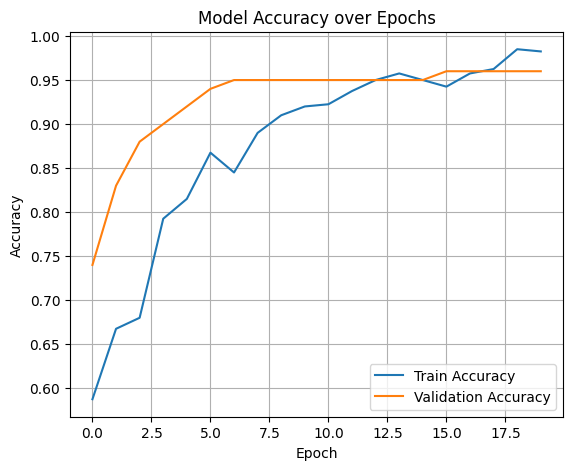

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


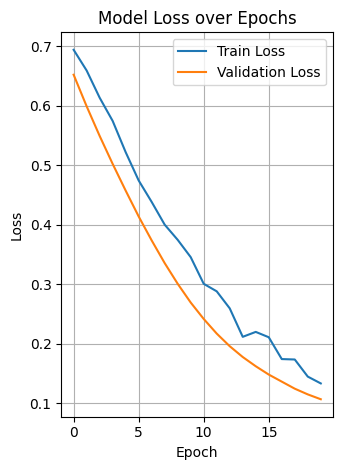

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc, f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve , average_precision_score

In [28]:
y_pred_ann = (model_ann.predict(X_test) > 0.5).astype(int)

# Create a DataFrame to display the actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred_ann.flatten()
})

# Print the first few rows of the results
print("Actual vs Predicted Values:")
print(results_df.head(10))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Actual vs Predicted Values:
   Actual  Predicted
0       1          1
1       0          0
2       1          1
3       0          0
4       0          0
5       1          1
6       1          1
7       0          0
8       0          0
9       1          1


In [29]:
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Artificial Neural Network (ANN) Accuracy Score:", accuracy_ann)

Artificial Neural Network (ANN) Accuracy Score: 0.96


CNN

In [30]:
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

In [31]:
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(64, 3, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

In [32]:
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=32, verbose=0, validation_data=(X_test_cnn, y_test_cnn))

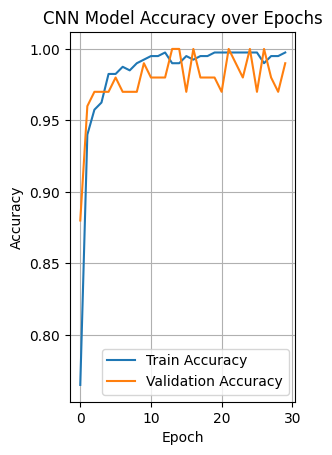

In [34]:
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

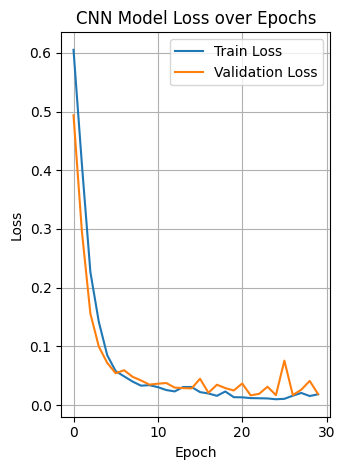

In [35]:
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [36]:
y_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype(int)

# Create a DataFrame to display the actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test_cnn.values.flatten(),
    'Predicted': y_pred_cnn.flatten()
})

# Print the first few rows of the results
print("Actual vs Predicted Values:")
print(results_df.head(10))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Actual vs Predicted Values:
   Actual  Predicted
0       1          1
1       0          0
2       1          1
3       0          0
4       0          0
5       1          1
6       1          1
7       0          0
8       0          0
9       1          1


In [37]:
accuracy_cnn = accuracy_score(y_test_cnn, y_pred_cnn)
print("Convolutional Neural Network (CNN) Model Accuracy Score:", accuracy_cnn)

Convolutional Neural Network (CNN) Model Accuracy Score: 0.99


In [38]:
import pickle

In [39]:
filename = 'kidney_model.sav'
pickle.dump(model_cnn, open(filename, 'wb'))

In [40]:
loaded_model = pickle.load(open('kidney_model.sav', 'rb'))

In [41]:
for column in X.columns:
  print(column)

age
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu
sc
sod
pot
hemo
pcv
wc
rc
htn
dm
cad
appet
pe
ane
